In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("D:\Classes\CSCE320\Project\Crimes_-_2001_to_Present.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [4]:
df = data[data['Latitude'].notna()]
df = df[df['Longitude'].notna()]
df = df[df['Year'] > 2015]

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
60280,11556037,JC103643,01/03/2019 07:20:00 PM,0000X W RWY 27R,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,...,41.0,76.0,26,1100374.0,1943906.0,2019,08/17/2019 03:57:45 PM,42.002816,-87.906094,"(42.002816387, -87.90609433)"
62198,11626027,JC188126,03/16/2019 05:58:00 PM,001XX N WELLS ST,0460,BATTERY,SIMPLE,STREET,False,False,...,42.0,32.0,08B,1174723.0,1900866.0,2019,08/17/2019 03:57:45 PM,41.883369,-87.633860,"(41.88336939, -87.633860272)"
62538,11622422,JC183696,03/12/2019 10:00:00 PM,008XX E 38TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,4.0,36.0,06,1182276.0,1879784.0,2019,08/17/2019 03:57:45 PM,41.825347,-87.606781,"(41.825346902, -87.606780575)"
62570,11625922,JC185669,03/14/2019 06:42:00 PM,074XX N PAULINA ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,49.0,1.0,08B,1163827.0,1949311.0,2019,08/17/2019 03:57:45 PM,42.016542,-87.672499,"(42.016541612, -87.672499325)"
62571,11622907,JC185406,03/14/2019 04:03:00 PM,008XX E 38TH PL,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,...,4.0,36.0,26,1182227.0,1879766.0,2019,08/17/2019 03:57:45 PM,41.825299,-87.606961,"(41.825298645, -87.6069609)"


In [6]:
print(df['Longitude'].min())

BBox = ((-87.7738,   -87.5658, 41.8096, 41.9653))

print(BBox)

-91.686565684
(-87.7738, -87.5658, 41.8096, 41.9653)


In [7]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

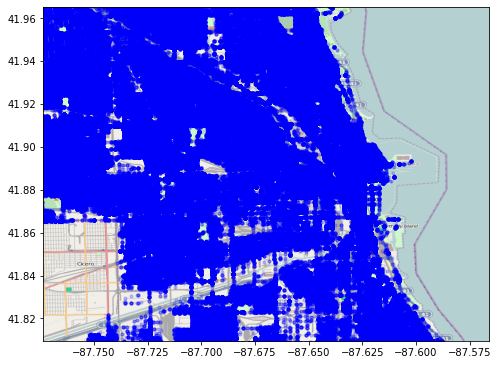

In [8]:
chicagoMap = plt.imread('D:\Classes\CSCE320\Project\ChicagoCrimeAnalysis\Location_map_Chicago.png')

fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(df['Longitude'],df['Latitude'], zorder=1, alpha=0.2,c='b',s=10)


ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])



ax.imshow(chicagoMap, zorder=0, extent = BBox, aspect= 'equal')

In [45]:
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [95]:
opt = []

types = ['All']
types += data['Primary Type'].value_counts().index.tolist()


for i in range(2001,2021):
    opt.append(str(i))
    
typeDrop = widgets.Dropdown(
    options=types,
    value='All',
    description='Type:'
)

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)

drop2 = widgets.Dropdown(
    options=opt,
    value='2020',
    description='Year:'
)


yr1 = drop
cmpr = widgets.Checkbox(description='Compare')
yr2 = drop2
ui = widgets.HBox([typeDrop,yr1, cmpr,yr2])

def f(typeOf,year1, compare, year2):
    
    dfYear = data[data['Year'] == int(year1)]
    
    if typeOf != 'All':
            dfYear = dfYear[dfYear['Primary Type'] == typeOf]
    
    crime_types = dfYear['Primary Type'].value_counts().index.tolist()
    crime_types_count = dfYear['Primary Type'].value_counts()
    
    title = year1 + " Type of Crime"
    
    if compare == True:

        title = year1 + " vs. " + year2+" Type of Crime"
        dfYear2 = data[data['Year'] == int(year2)]
        
        if typeOf != 'All':
            dfYear2 = dfYear2[dfYear2['Primary Type'] == typeOf]
            
        crime_types2 = dfYear2['Primary Type'].value_counts().index.tolist()
        crime_types_count2 = dfYear2['Primary Type'].value_counts()
        
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(crime_types,crime_types_count,color = 'b',label=year1)
        ax.barh(crime_types2,crime_types_count2,color = 'r',label=year2)
#         ax.set_xticks(rotation=0)
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else:

        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(crime_types,crime_types_count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(crime_types_count):
            plt.text(value, index, str(value))
        plt.show()
    
#     if compare == True:
#         interact(f, year1=drop, compare=False,year2)

    
#interact(f, year=drop, compare=False)
out = widgets.interactive_output(f, {'typeOf': typeDrop, 'year1': yr1, 'compare' : cmpr, 'year2':yr2})

display(ui,out)


Output()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 4. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]]


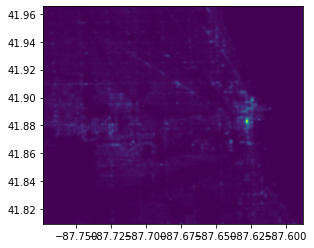

In [16]:
import numpy as np
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['Latitude']>41.8096]
df = df[df['Latitude']<41.9653]
df = df[df['Longitude']>-87.7738]
df = df[df['Longitude']<-87.5658]

y = df.loc[:, 'Latitude'].tolist()
x = df.loc[:, 'Longitude'].tolist()

heatmap, xedges, yedges = np.histogram2d(x,y,bins=1000)
print(heatmap)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=4)

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()